In [38]:
# Load results from experiments

import pickle 
import os 
import jax 
import re
import numpy as np
from pathlib import Path
from collections import defaultdict as dd
import matplotlib.pyplot as plt 
import pandas as pd

In [44]:
results_folder = "/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/ray_results"

exp_name_map = {
    "i010_bc_200_base": "BC", 
    "i011_bc_aug_pvar": "BC + Aug (PVar Reweighted)",
    "i012_bc_aug_if": "BC + Aug (IF)"
}

# group results based on seed 
results = {}

# search exps under the folder
exp_names = list(exp_name_map.keys())
for exp_name in exp_names:
    exp_folder = Path(results_folder) / exp_name
    exp_folders = list(exp_folder.glob("*"))

    exp_results = dd(list)

    for folder in exp_folders:
        if not folder.is_dir():
            continue
        
        base_name = folder.name
        
        # remove seed from name
        base = re.sub(r'_s-\d', '', base_name)

        # look at the ckpt files to see the best result 
        ckpt_folder = folder / "model_ckpts"
        
        # print(ckpt_folder)
        if not ckpt_folder.exists():
            print(f"No ckpt folder for {ckpt_folder}")
            continue

        best_f = ckpt_folder / "best.txt"
        if not best_f.exists():
            continue

        with open(best_f, 'r') as f:
            epoch, sr = f.read().split(",")
            sr = sr.strip()

        # remove the exp name from the base name
        base = re.sub(f"{exp_name}_nt-", '', base)
        base = int(base)
        exp_results[base].append(float(sr))

    results[exp_name_map[exp_name]] = exp_results

# convert to dataframe
df = pd.DataFrame.from_dict(results, orient='index')

# sort dataframe by name 
df = df.reindex(sorted(df.columns), axis=1).transpose()

# take the mean of each cell in df
df_mean = df.map(lambda x: np.mean(x))
df_std = df.map(lambda x: np.std(x))

No ckpt folder for /scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/ray_results/i012_bc_aug_if/i012_bc_aug_if_nt-125_s-2/model_ckpts
No ckpt folder for /scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/ray_results/i012_bc_aug_if/i012_bc_aug_if_nt-5_s-2/model_ckpts
No ckpt folder for /scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/ray_results/i012_bc_aug_if/i012_bc_aug_if_nt-100_s-2/model_ckpts
No ckpt folder for /scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/ray_results/i012_bc_aug_if/i012_bc_aug_if_nt-50_s-2/model_ckpts
No ckpt folder for /scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/ray_results/i012_bc_aug_if/i012_bc_aug_if_nt-10_s-2/model_ckpts
No ckpt folder for /scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/ray_results/i012_bc_aug_if/i012_bc_aug_if_nt-25_s-2/model_ckpts


In [45]:
df, df_mean

(                     BC BC + Aug (PVar Reweighted) BC + Aug (IF)
 5      [0.3, 0.24, 0.3]         [0.38, 0.44, 0.46]        [0.18]
 10    [0.6, 0.46, 0.34]          [0.34, 0.44, 0.5]        [0.28]
 25     [0.44, 0.3, 0.4]         [0.42, 0.52, 0.54]         [0.3]
 50   [0.36, 0.48, 0.44]          [0.5, 0.44, 0.62]  [0.42, 0.22]
 100   [0.62, 0.44, 0.5]          [0.54, 0.4, 0.54]   [0.4, 0.36]
 125    [0.6, 0.7, 0.42]           [0.68, 0.6, 0.5]  [0.46, 0.38],
            BC  BC + Aug (PVar Reweighted)  BC + Aug (IF)
 5    0.280000                    0.426667           0.18
 10   0.466667                    0.426667           0.28
 25   0.380000                    0.493333           0.30
 50   0.426667                    0.520000           0.32
 100  0.520000                    0.493333           0.38
 125  0.573333                    0.593333           0.42)

Text(0, 0.5, 'Success Rate (%)')

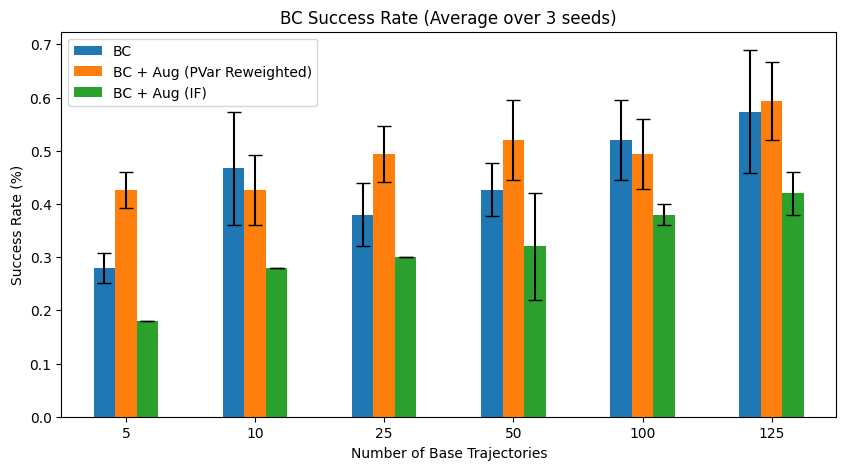

In [46]:
ax = df_mean.plot(yerr=df_std, kind="bar", rot=0, capsize=5, figsize=(10, 5))
ax.set_title('BC Success Rate (Average over 3 seeds)')
ax.set_xlabel('Number of Base Trajectories')
ax.set_ylabel('Success Rate (%)')